In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
# Load datasets
training_schedule = pd.read_csv('./datas/training_schedule.csv')
assessment_schedule = pd.read_csv('./datas/assessment_schedule.csv')
scores = pd.read_csv('./datas/scores.csv')


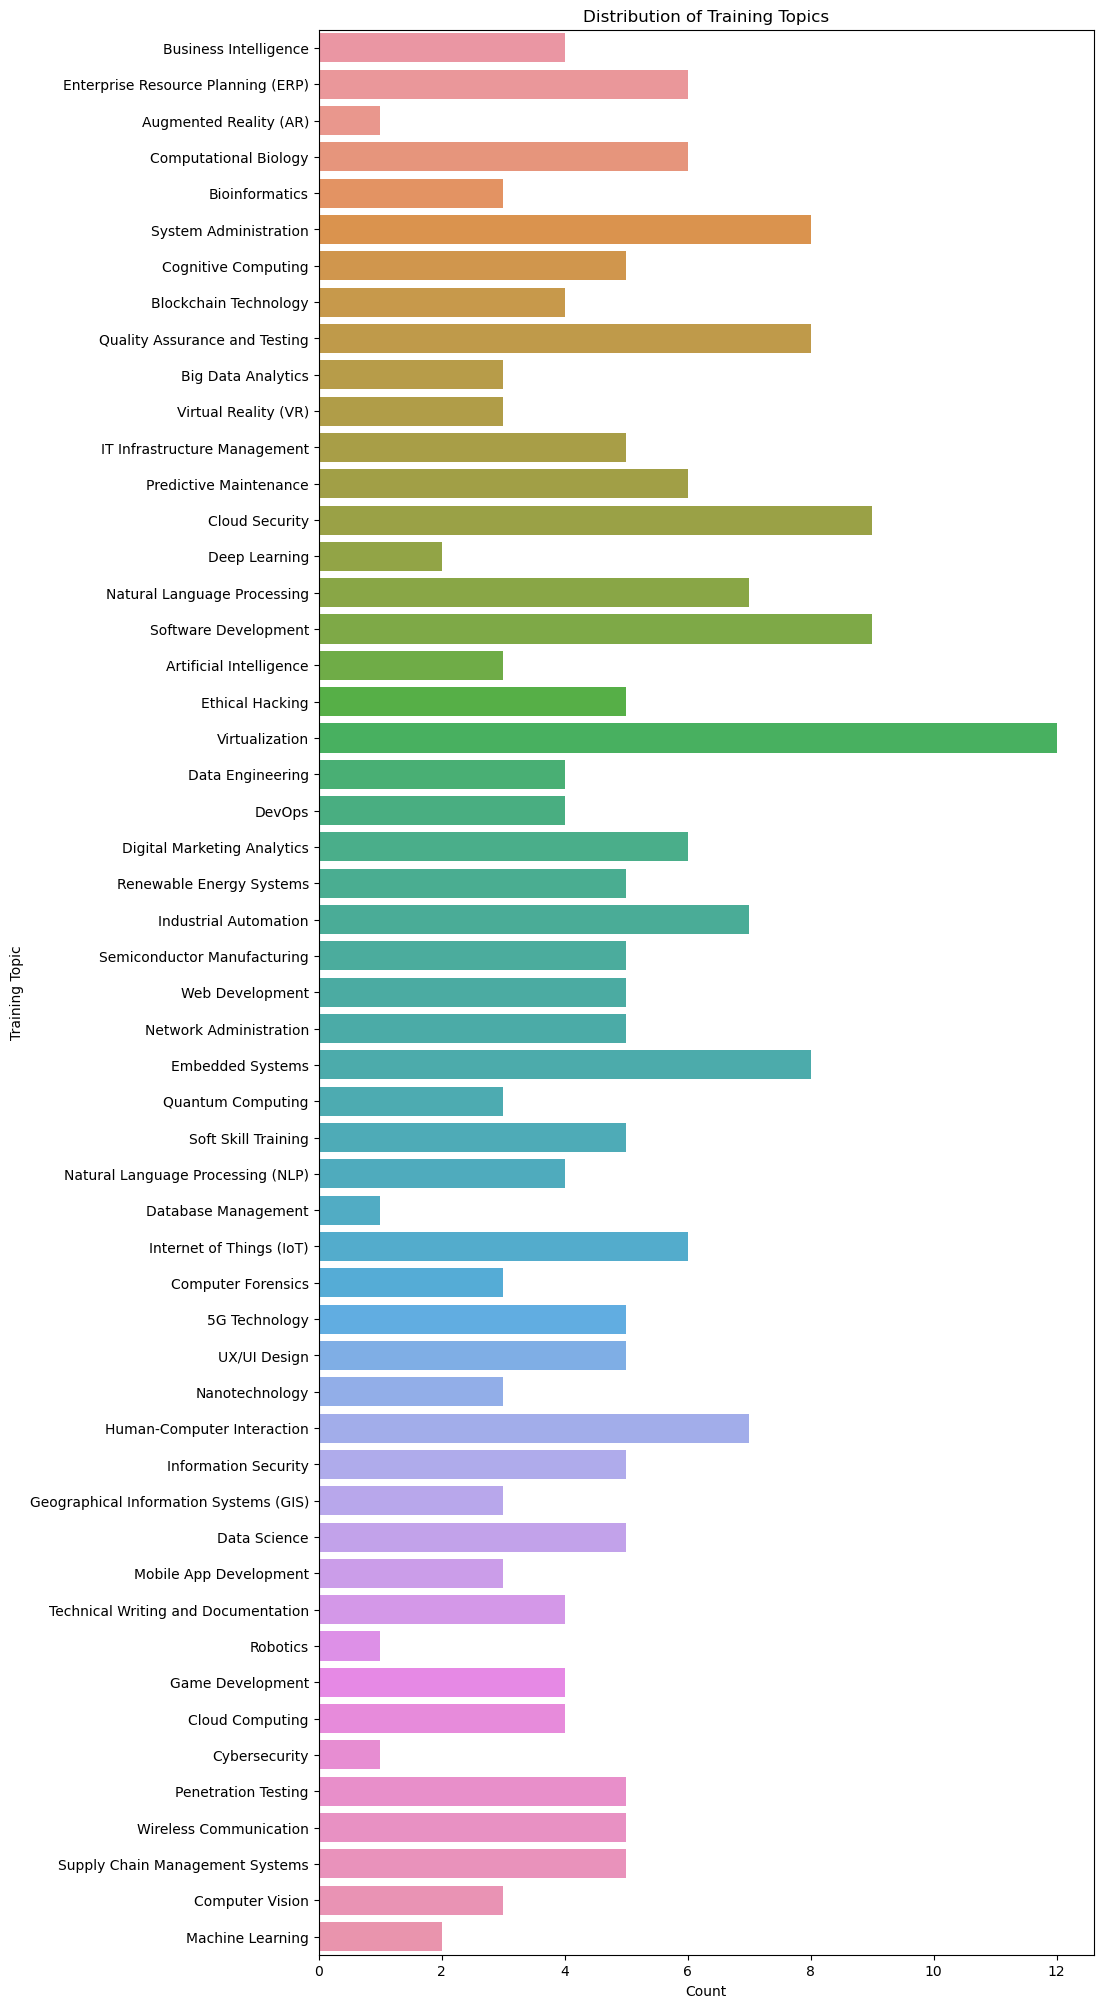

In [23]:
# Exploratory Data Analysis (EDA) and Visualization for Training Schedule
# Visualize distribution of training topics
plt.figure(figsize=(10, 25))
sns.countplot(data=training_schedule, y='Training Topic')
plt.title('Distribution of Training Topics by count')
plt.xlabel('Count')
plt.ylabel('Training Topic')
plt.show()

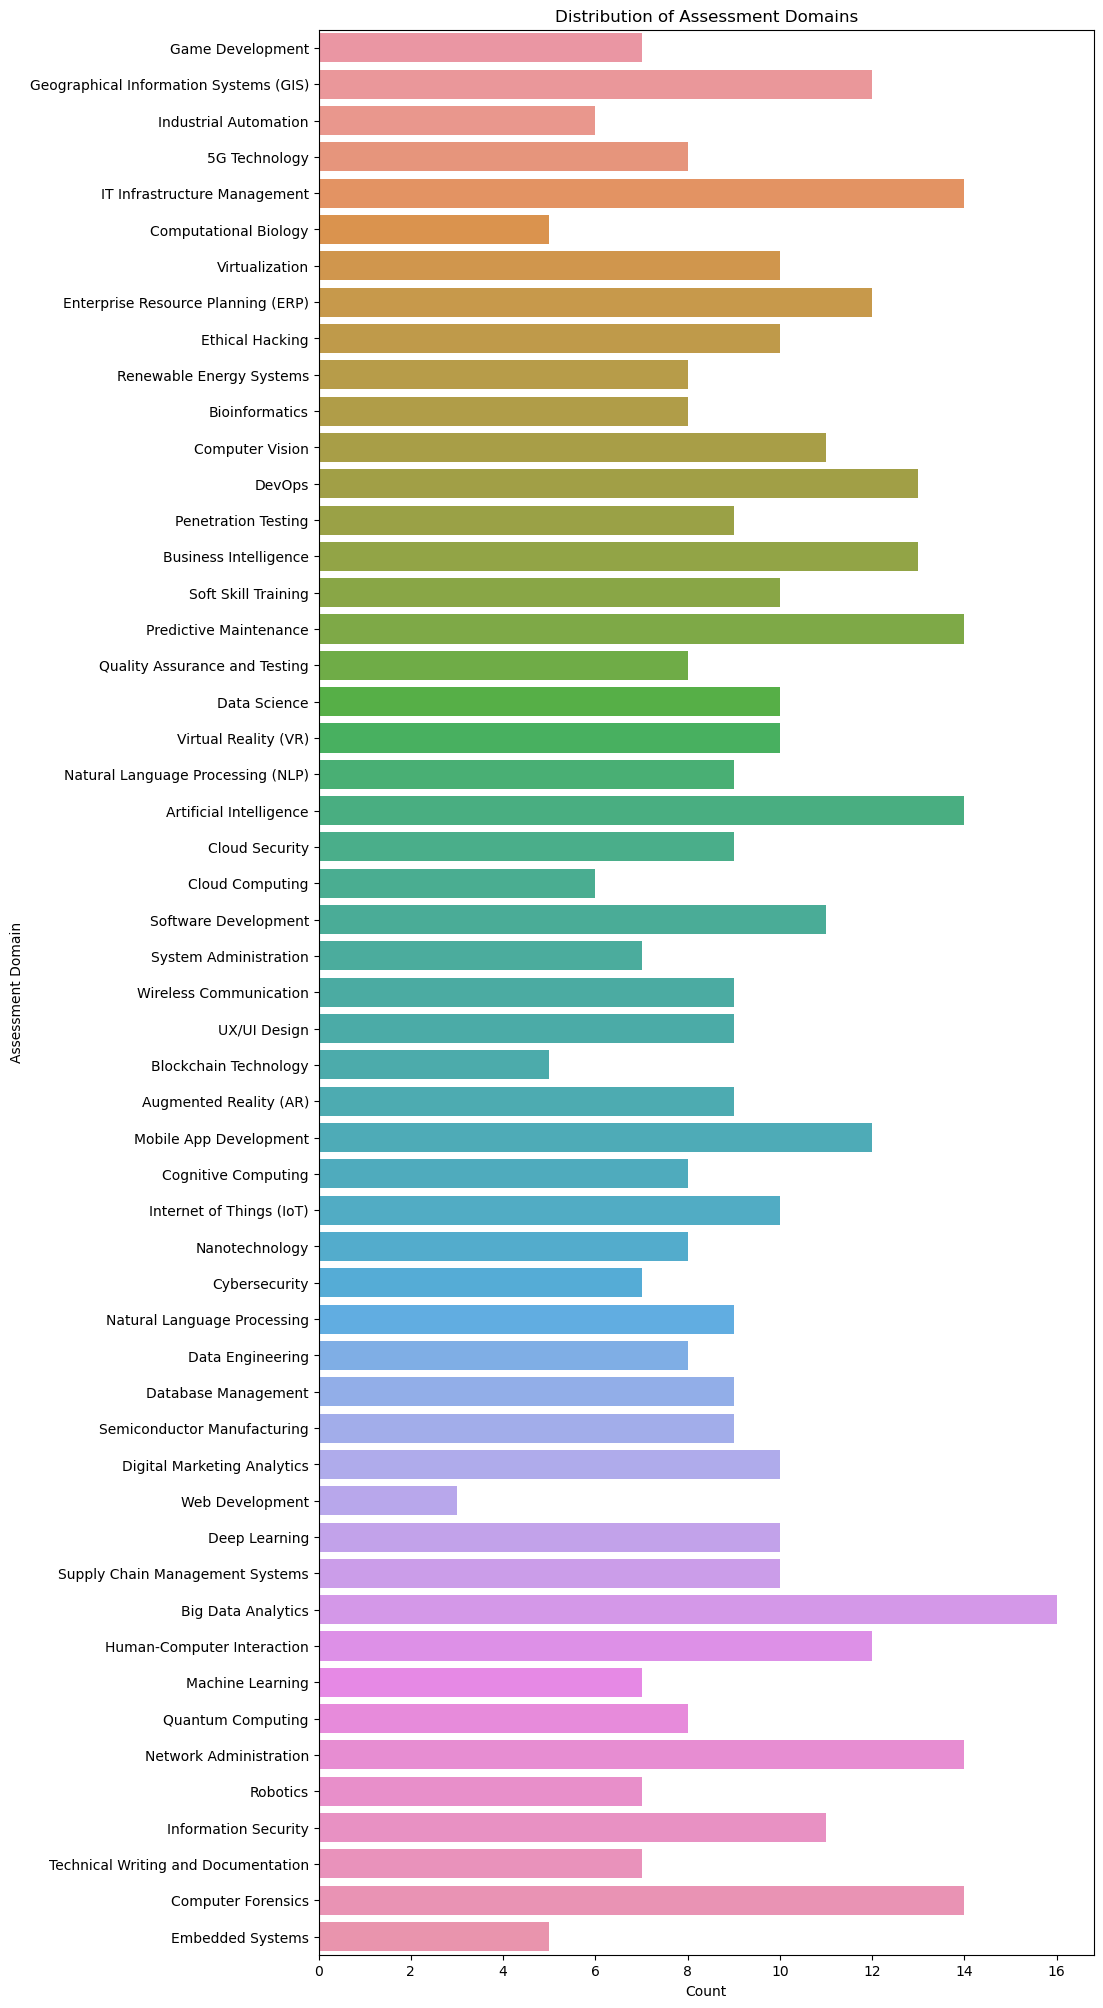

In [25]:
# Exploratory Data Analysis (EDA) and Visualization for Assessment Schedule
# Visualize distribution of assessment topics
plt.figure(figsize=(10, 25))
sns.countplot(data=assessment_schedule, y='Assessment Domain')
plt.title('Distribution of Assessment Domains')
plt.xlabel('Count')
plt.ylabel('Assessment Domain')
plt.show()

C:\Users\BhavanaS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


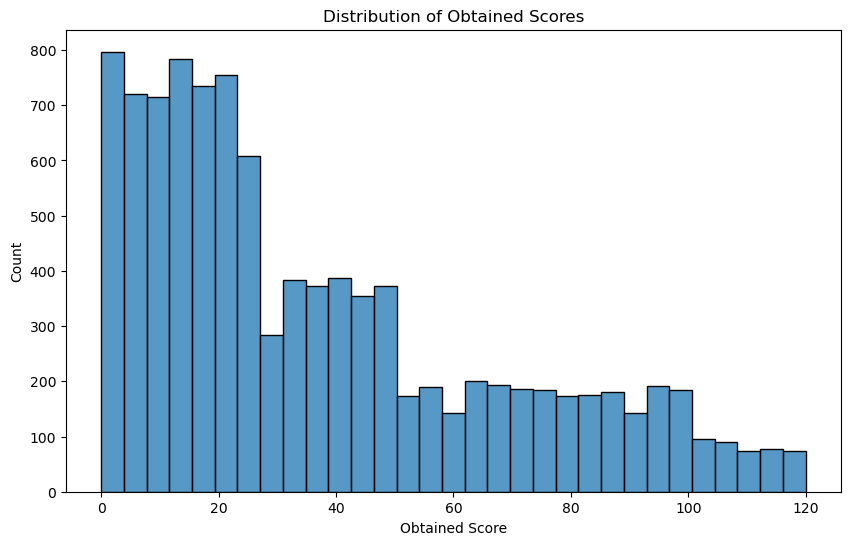

In [27]:

# Exploratory Data Analysis (EDA) and Visualization for Scores
# Visualize distribution of obtained scores
plt.figure(figsize=(10, 6))
sns.histplot(data=scores, x='Obtained Score')
plt.title('Distribution of Obtained Scores')
plt.xlabel('Obtained Score')
plt.ylabel('Count')
plt.show()

In [5]:
# Merge datasets to get scores and training topics
merged_data = pd.merge(scores, assessment_schedule, on='Assessment ID')
merged_data = pd.merge(merged_data, training_schedule, left_on='Assessment Domain', right_on='Training Topic')

In [6]:
# Calculate average score for each training topic
average_scores = merged_data.groupby('Training Topic')['Obtained Score'].mean().reset_index()
average_scores.rename(columns={'Obtained Score': 'Average Score'}, inplace=True)

In [7]:
# Merge average scores with training schedule data
training_schedule = pd.merge(training_schedule, average_scores, left_on='Training Topic', right_on='Training Topic')

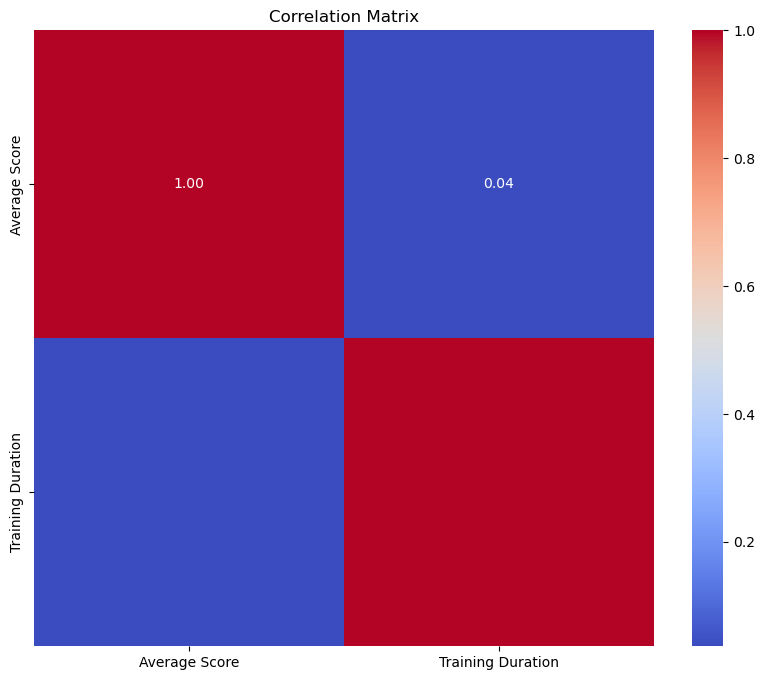

In [36]:

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = training_schedule[['Average Score', 'Training Duration']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

C:\Users\BhavanaS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BhavanaS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x600 with 0 Axes>

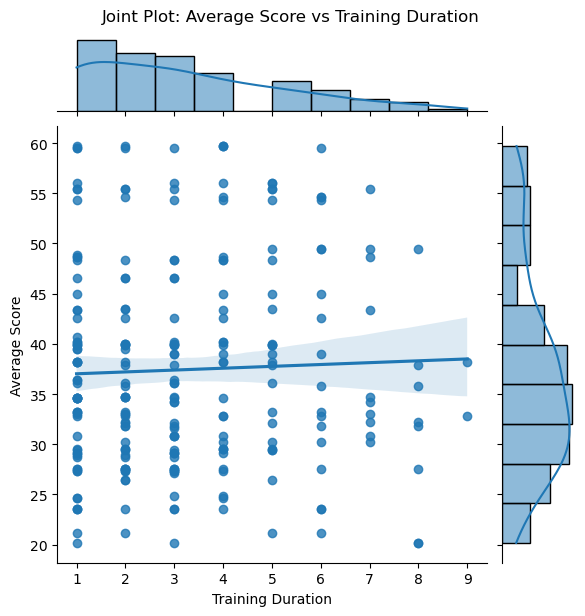

In [38]:
#Visualize relationship between average score and training duration using joint plot
plt.figure(figsize=(8, 6))
sns.jointplot(x='Training Duration', y='Average Score', data=training_schedule, kind='reg')
plt.suptitle('Joint Plot: Average Score vs Training Duration', y=1.02)
plt.show()

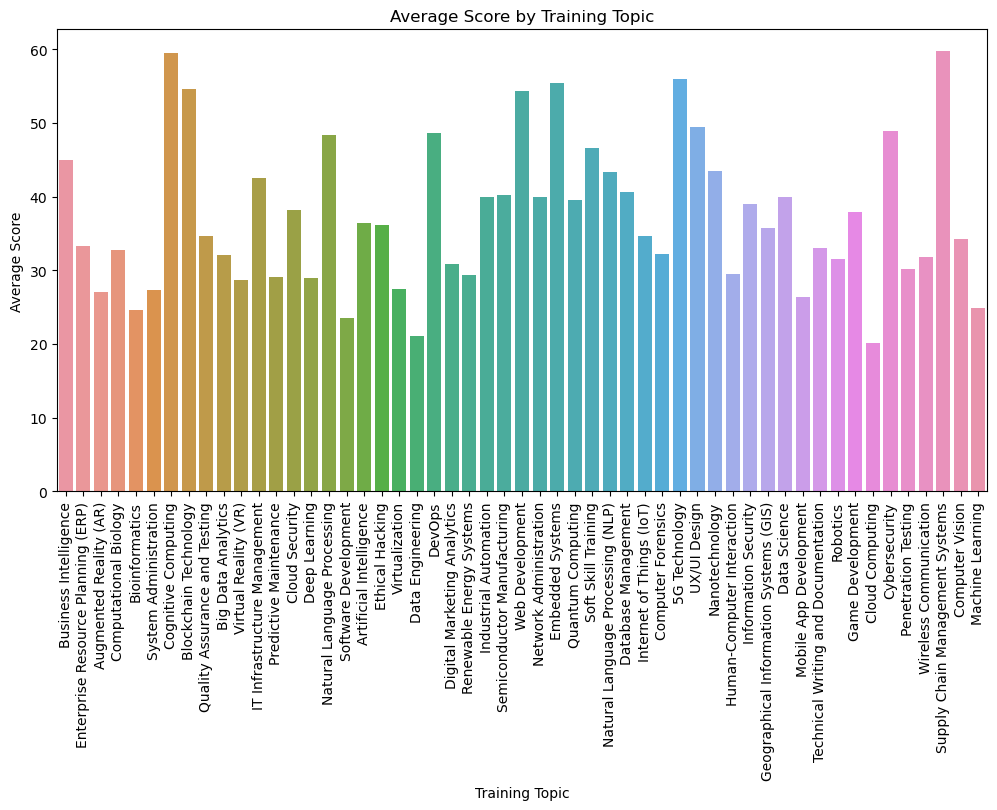

In [8]:

# Plot average scores by training topic
plt.figure(figsize=(12, 6))
sns.barplot(x='Training Topic', y='Average Score', data=training_schedule)
plt.xticks(rotation=90)
plt.title('Average Score by Training Topic')
plt.xlabel('Training Topic')
plt.ylabel('Average Score')
plt.show()

In [10]:
# Calculate duration of each training
training_schedule['Training Duration'] = training_schedule['Training End Time'] - training_schedule['Training Start Time']

training_schedule['Training Duration']

0      1
1      4
2      6
3      5
4      1
      ..
245    3
246    3
247    7
248    4
249    3
Name: Training Duration, Length: 250, dtype: int64

In [11]:

# Merge training schedule data with merged data
merged_data = pd.merge(merged_data, training_schedule, on='Training Topic')

# Calculate percentage knowledge of learners
merged_data['Percentage Knowledge'] = (merged_data['Obtained Score'] / merged_data['Total Score']) * 100

# Calculate correlation between training duration and percentage knowledge
correlation = merged_data['Training Duration'].corr(merged_data['Percentage Knowledge'])
print("Correlation between Training Duration and Percentage Knowledge:", correlation)

Correlation between Training Duration and Percentage Knowledge: 0.011950894804964887


In [12]:

# Prepare data for regression model
X = merged_data[['Training Duration']]
y = merged_data['Percentage Knowledge']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:


# Create and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [14]:

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6240.365152961242


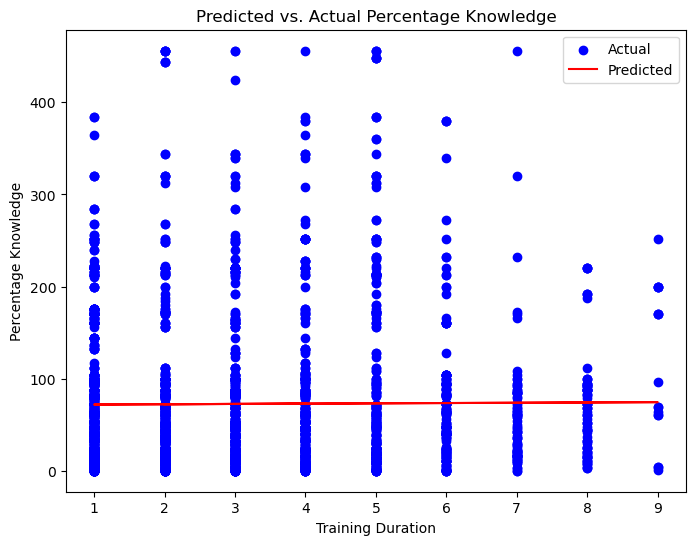

In [15]:

# Plot predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Predicted vs. Actual Percentage Knowledge')
plt.xlabel('Training Duration')
plt.ylabel('Percentage Knowledge')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R^2) - Coefficient of Determination
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Squared Error: 6240.365152961242
Root Mean Squared Error: 78.99598187858192
R-squared (R^2): 0.00032017790197036433
Mean Absolute Error: 55.52053939784471
